In [7]:
from IPython.display import Image
import os

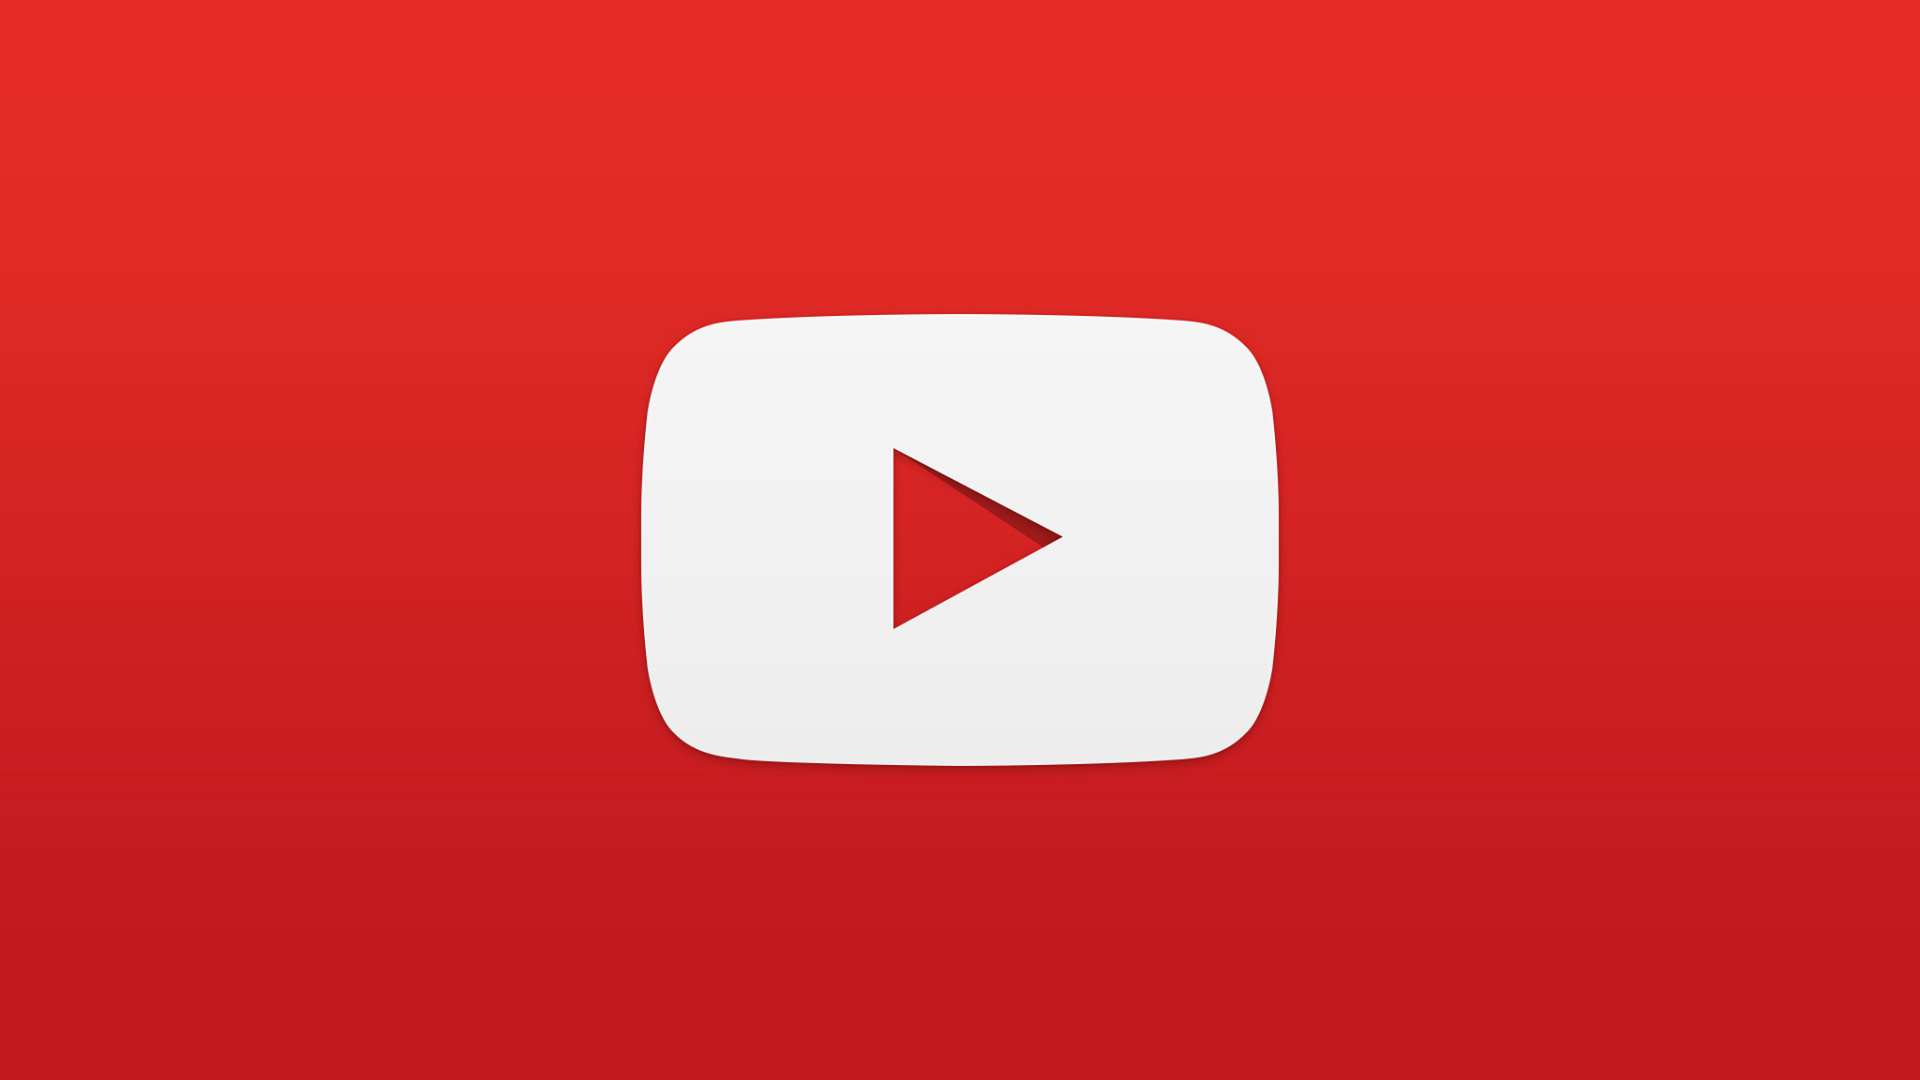

In [4]:
Image('youtube-logo-1920.jpg')

In [2]:
# import necessary libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import collections
import pickle
import gc

In [3]:
ca_videos_df = pd.read_csv("Data/CAvideos.csv")

In [4]:
ca_videos_df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...


In [8]:
ca_videos_df.groupby(['channel_title'],as_index=False).views.sum()

,channel_title,views
0,#AndresSTyle,1330191
1,#Mind Warehouse,39464664
2,#SeekingTheTruth,119011
3,* Martyna *,44973
4,- 欢迎订阅 -浙江卫视【奔跑吧】官方频道,48769105
...,...,...
5071,창조영감클럽,75953
5072,타우TV,471919
5073,포스트쉐어,1658045
5074,포크포크,605936


In [25]:
df = pd.DataFrame(ca_videos_df.groupby(['trending_date','channel_title','title'], as_index=False).views.sum())

In [27]:
df.sort_values(by=['channel_title'])

,trending_date,channel_title,title,views
40290,18.31.01,#AndresSTyle,TOP 10 RETURNS In 30 Women's Royal Rumble Matc...,456096
39490,18.30.01,#AndresSTyle,TOP 10 RETURNS In 30 Women's Royal Rumble Matc...,353694
9792,18.01.02,#AndresSTyle,TOP 10 RETURNS In 30 Women's Royal Rumble Matc...,520401
28920,18.19.02,#Mind Warehouse,7 MYSTERY RIDDLES ONLY THE SMARTEST 1% CAN SOLVE,406558
29317,18.19.04,#Mind Warehouse,"APRIL 18TH, 2018. WHAT WILL HAPPEN?",3314231
...,...,...,...,...
20165,18.10.02,창조영감클럽,평창동계올림픽 개막식 (1),75953
10381,18.01.04,타우TV,[타우] 알루미늄 호일로 쇠구슬 만들기,471919
31113,18.21.02,포스트쉐어,노선영 따돌리는 김보름·박지우 모습에 제갈성렬 배성재가 날린 일침 [평창올림픽],1658045
39489,18.29.05,포크포크,"참전용사 차 멈춰 세운 경찰. '차 앞'을 보고, 눈물 바다가 되는데",605936
